In [ ]:
# Helloooooooooooooo theree

In [2]:
import mne
from mne.preprocessing import ICA
import scipy.io
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot 


Shape of eeg_signals: (128, 225411)
Number of channels from eeg_signals_reshaped: 225411
Number of channels from eeg_data['nbchan']: 128
Creating RawArray with float64 data, n_channels=225411, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.254 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/67/px5mx0bn1_q210bbqh8c09h80000gn/T/ipykernel_39114/1895213205.py:42: RuntimeWarning: filter_length (1651) is longer than the signal (128), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_raw.filter(l_freq=1, h_freq=40)  # Adjust the frequency range as needed


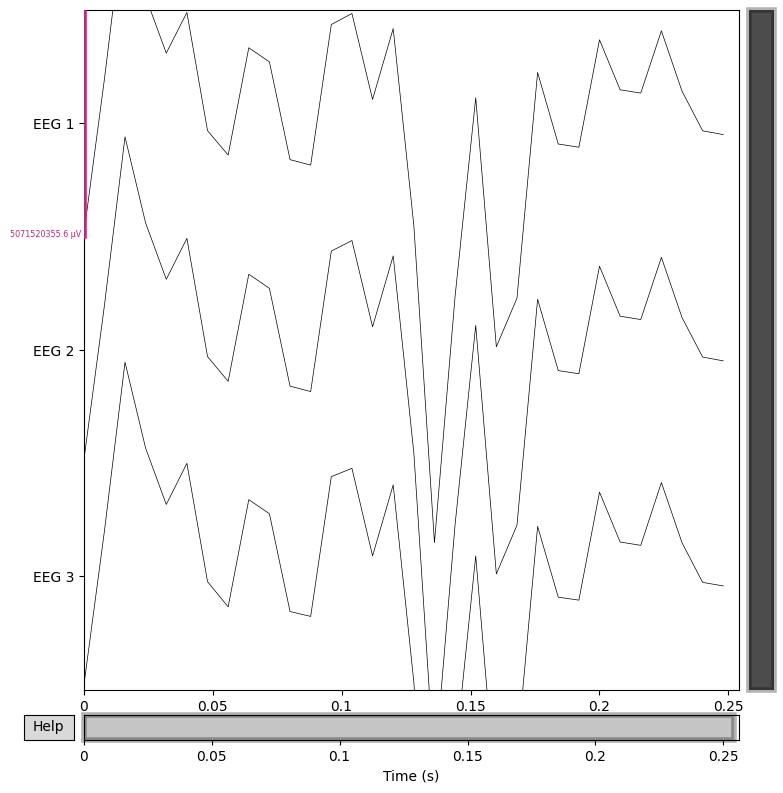

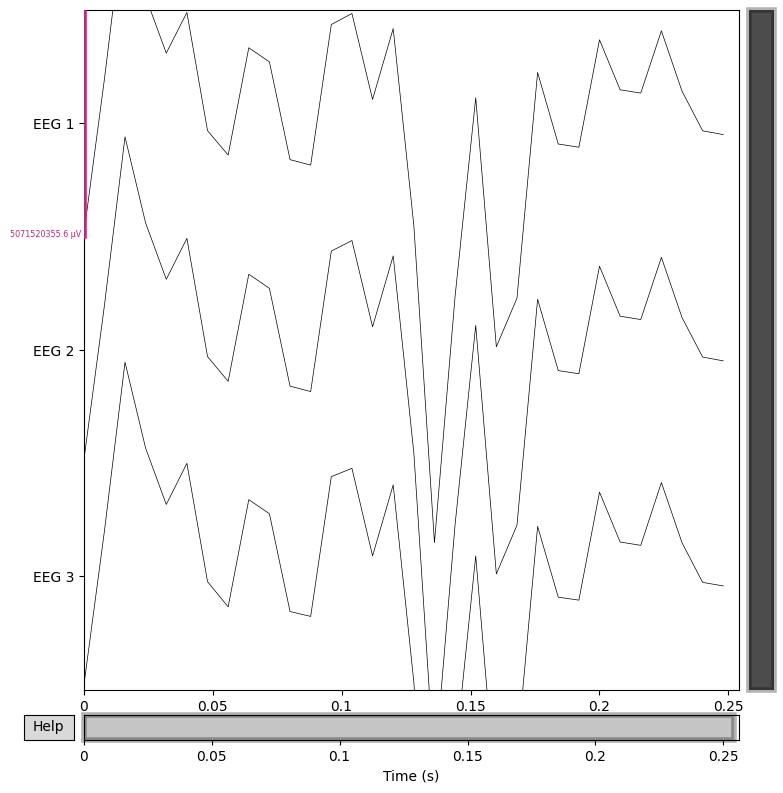

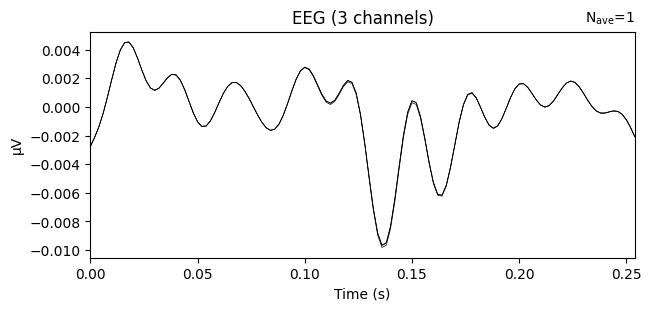

<Figure size 640x480 with 0 Axes>

In [6]:
File_name = "/Users/aekkritkuntipalo/Desktop/Brain_Hackthaton/YAC_RawData/YAC_NR1_EEG.mat"
mat_data = scipy.io.loadmat(File_name)
eeg_data = mat_data['EEG']

#Extract information
sampling_rate = eeg_data['srate'][0, 0][0, 0]
num_channels = eeg_data['nbchan'][0, 0][0, 0]
num_samples = eeg_data['pnts'][0, 0][0, 0]
eeg_signals = eeg_data['data'][0, 0]

eeg_signals = eeg_data['data'][0, 0]
eeg_signals_reshaped = np.transpose(eeg_signals)

# Print the shape of eeg_signals
print(f"Shape of eeg_signals: {eeg_signals.shape}")

# Extract the number of channels from the shape of eeg_signals_reshaped
num_channels = eeg_signals_reshaped.shape[0]
print(f"Number of channels from eeg_signals_reshaped: {num_channels}")

# Extract the number of channels directly from eeg_data
# This assumes that nbchan is indeed the number of channels
num_channels_from_data = eeg_data['nbchan'][0, 0][0, 0]
print(f"Number of channels from eeg_data['nbchan']: {num_channels_from_data}")

# Assuming 'eeg_data' is your EEG data structure
num_channels_from_data = eeg_data['nbchan'][0, 0][0, 0]


# Create an MNE Info object
ch_names = [f'EEG {i + 1}' for i in range(num_channels)]
info = mne.create_info(ch_names=ch_names[:eeg_signals_reshaped.shape[0]], sfreq=sampling_rate, ch_types='eeg')

# Create MNE Raw object
raw = mne.io.RawArray(eeg_signals_reshaped, info)

# Filter only specific channels
picked_channels = [0,1,2]  # Adjust these indices based on the channels you want to visualize
filtered_raw = raw.copy().pick_channels([raw.ch_names[i] for i in picked_channels])

# Apply filtering if needed
filtered_raw.filter(l_freq=1, h_freq=40)  # Adjust the frequency range as needed

# Plot the filtered EEG data for the selected channels
filtered_raw.plot(scalings='auto', duration=1)  # Adjust duration as needed

import matplotlib.pyplot as plt

# Plot the filtered EEG data for the selected channels
filtered_raw.plot(scalings='auto', duration=1)  # Adjust duration as needed

# Assuming you have filtered_raw as your filtered Raw object
# Create an Evoked object from the filtered raw data
evoked = mne.EvokedArray(filtered_raw.get_data(), filtered_raw.info, tmin=0)

# Plot the evoked data
evoked.plot(scalings={'eeg': 1e-6})  # Adjust the scaling factor as needed

plt.tight_layout()
plt.show()